Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 875s 931ms/step - accuracy: 0.7156 - loss: 0.8498 - val_accuracy: 0.9434 - val_loss: 0.1736
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 870s 927ms/step - accuracy: 0.9361 - loss: 0.2067 - val_accuracy: 0.9599 - val_loss: 0.1197
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 927s 933ms/step - accuracy: 0.9478 - loss: 0.1655 - val_accuracy: 0.9671 - val_loss: 0.1018
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 897s 956ms/step - accuracy: 0.9553 - loss: 0.1421 - val_accuracy: 0.9696 - val_loss: 0.0934
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 893s 952ms/step - accuracy: 0.9596 - loss: 0.1280 - val_accuracy: 0.9716 - val_loss: 0.0876
157/157 ━━━━━━━━━━━━━━━━━━━━ 127s 812ms/step - accuracy: 0.9712 - loss: 0.0893
Test Loss: 0.08758566528558731
Test Accuracy: 0.9715999960899353
157/157 ━━━━━━━━━━━━━━━━━━━━ 126s 799ms/step


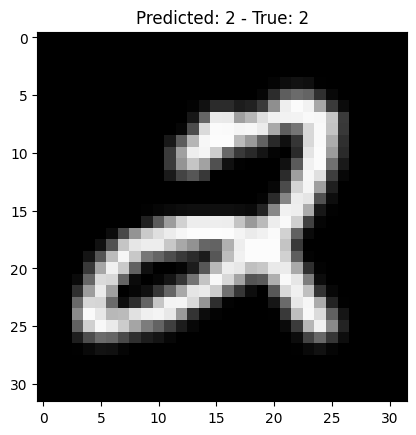

True label: 2


In [40]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np


In [41]:

(train_data, test_data), info = tfds.load('mnist', as_supervised=True, split=['train', 'test'], with_info=True)

In [42]:
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.grayscale_to_rgb(image)
    image = tf.image.resize(image, (32, 32))
    return image, label

In [43]:
train_data = train_data.map(preprocess_image).batch(64).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess_image).batch(64).prefetch(tf.data.AUTOTUNE)

In [44]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [45]:
for layer in vgg_model.layers:
    layer.trainable = False

In [47]:
custom_classifier = models.Sequential([
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [48]:
model = models.Sequential([
    vgg_model,
    custom_classifier
])

In [49]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
 76/938 ━━━━━━━━━━━━━━━━━━━━ 11:23 793ms/step - accuracy: 0.3600 - loss: 1.8935

In [ ]:
loss, acc = model.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", acc)

pred = model.predict(test_data)

In [ ]:
labels = [str(i) for i in range(10)]

In [ ]:
for image, label in test_data.take(1):
    idx = 0
    plt.imshow(image[idx], cmap='gray')
    plt.title(f"Predicted: {labels[np.argmax(pred[idx])]} - True: {labels[label[idx]]}")
    plt.show()

print("True label:", labels[label[idx]])